# Basic pipe net

We start with the basic pipe net again:

hp.pandapower.plotting.plotly.traces - INFO: Failed to import plotly - interactive plotting will not be available
hp.pandapower.plotting.plotting_toolbox - INFO: Interpreting color (0.00392156862745098, 0.45098039215686275, 0.6980392156862745) as rgb or rgba!
hp.pandapower.plotting.plotting_toolbox - WARNING: The number of given colors (1) is smaller than the number of nodes (31) to draw! The colors will be repeated to fit.
hp.pandapipes.plotting.collections - WARNING: use_junction_geodata is automatically set to True, since net.pipe_geodata is empty.


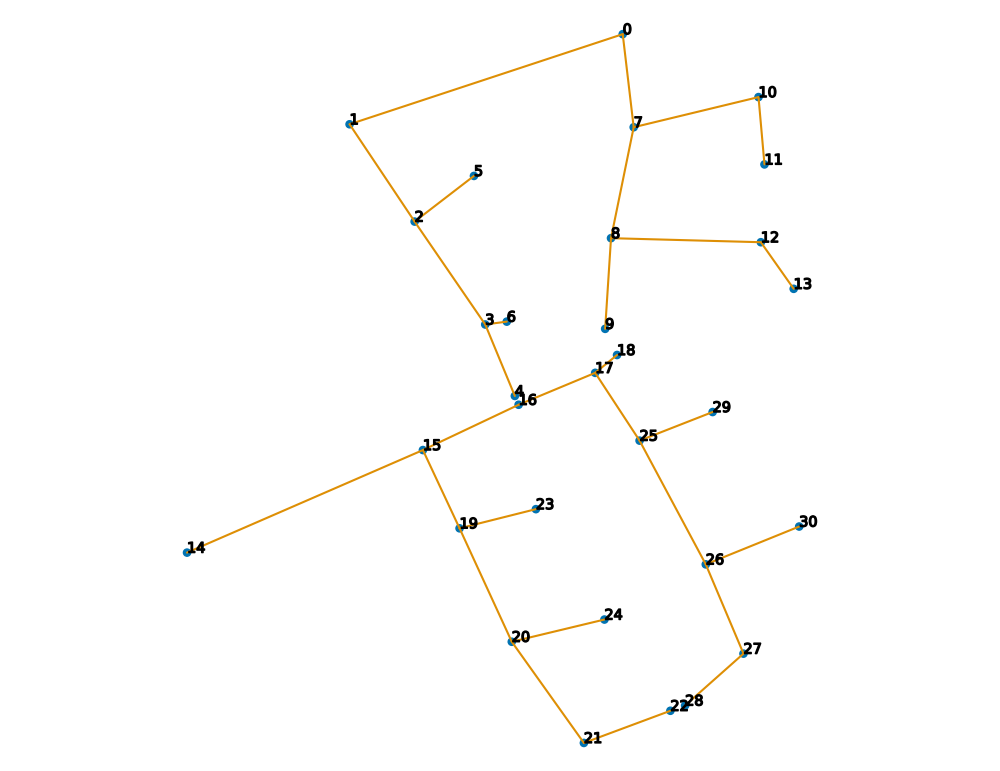

In [1]:
from os.path import join
import pandas as pd
import numpy as np
import pandapipes as pps

import seaborn as sb
import pandapipes.plotting as plot
import matplotlib.pyplot as plt

from pandapower.plotting import create_annotation_collection

input_dir = r'../net_data_pipe/'
in_junctions = pd.read_csv(join(input_dir, 'example_net-junctions.CSV'))
in_pipes = pd.read_csv(join(input_dir, 'example_net-pipes.CSV'))

fluid = 'hgas' # 'lgas', 'hydrogen', 'water'

net = pps.create_empty_network(fluid=fluid)

geodata = in_junctions[['lon', 'lat']].values

pps.create_junctions(net, nr_junctions=31, pn_bar=1, tfluid_k=283.15, height_m=in_junctions['height'], geodata=geodata)
pps.create_pipes_from_parameters(net, in_pipes['from_junction'], in_pipes['to_junction'], length_km=in_pipes['length_km'],
                                 diameter_m = 0.05, k_mm = 0.2)

colors = sb.color_palette('colorblind')

jc = plot.create_junction_collection(net, color=colors[0])
pc = plot.create_pipe_collection(net, color=colors[1])
coords = net.junction_geodata[['x','y']].values
jic = create_annotation_collection(size=20, texts = np.char.mod('%.0f', net.junction.index), 
                                    coords=coords, zorder=150, color='k')

collections = [jc, pc, jic]

plot.draw_collections(collections)
plt.show()


# Heat net

Here we add the relevant heat components:

In [2]:
input_dir = r'../net_data_pipe'
in_ijs = pd.read_csv(join(input_dir, 'example_net-intermediate_junctions.CSV'))

In [3]:
pps.create_fluid_from_lib(net, 'water')

In [4]:
pps.create_circ_pump_const_pressure(net, 4,9, 7, 3, t_flow_k=335)
pps.create_circ_pump_const_mass_flow(net, 22, 28, 10, 1, t_flow_k=330)

0

In [5]:
js = pps.create_junctions(net, 6, 1, 283.15, geodata=in_ijs[['lon', 'lat']].values)

In [6]:
pps.create_flow_controls(net, [5, 11, 14, 18, 23, 30], js, 0.5, 0.05)
pps.create_heat_exchangers(net, js, [6, 13, 19, 29, 24, 27], 0.1, 2000)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [7]:
pps.pipeflow(net)

In [8]:
net.res_junction.t_k

0     283.15
1     283.15
2     283.15
3     283.15
4     283.15
5     283.15
6     283.15
7     283.15
8     283.15
9     335.00
10    283.15
11    283.15
12    283.15
13    283.15
14    283.15
15    283.15
16    283.15
17    283.15
18    283.15
19    283.15
20    283.15
21    283.15
22    283.15
23    283.15
24    283.15
25    283.15
26    283.15
27    283.15
28    330.00
29    283.15
30    283.15
31    283.15
32    283.15
33    283.15
34    283.15
35    283.15
36    283.15
Name: t_k, dtype: float64

In [9]:
pps.pipeflow(net, mode='all')

In [10]:
net.res_junction.t_k

0     334.833952
1     334.833952
2     334.833952
3     334.667903
4     334.667903
5     334.833952
6     333.880511
7     334.833952
8     334.833952
9     335.000000
10    334.833952
11    334.833952
12    333.880511
13    333.880511
14    329.046560
15    329.046560
16    329.046560
17    329.046560
18    329.046560
19    328.569840
20    328.093119
21    328.093119
22    328.093119
23    328.569840
24    327.616399
25    329.046560
26    329.523280
27    329.523280
28    330.000000
29    328.093119
30    329.523280
31    334.833952
32    334.833952
33    329.046560
34    329.046560
35    328.569840
36    329.523280
Name: t_k, dtype: float64

In [11]:
net.res_circ_pump_mass

,mdot_flow_kg_per_s,deltap_bar
0,1.0,0.447604


In [12]:
net.res_flow_control

,v_mean_m_per_s,p_from_bar,p_to_bar,t_from_k,t_to_k,mdot_from_kg_per_s,mdot_to_kg_per_s,vdot_norm_m3_per_s,reynolds,lambda
0,0.254729,4.492202,4.444658,334.833952,334.833952,0.5,-0.5,0.000509,9786.923078,0.024492
1,0.254729,6.119408,7.012049,334.833952,334.833952,0.5,-0.5,0.000509,9786.923078,0.024492
2,0.254729,9.611891,9.645880,329.046560,329.046560,0.5,-0.5,0.000508,9786.923078,0.024492
3,0.254729,9.734831,9.839934,329.046560,329.046560,0.5,-0.5,0.000508,9786.923078,0.024492
4,0.254729,9.634550,9.645880,328.569840,328.569840,0.5,-0.5,0.000507,9786.923078,0.024492
5,0.254729,9.858352,9.958923,329.523280,329.523280,0.5,-0.5,0.000508,9786.923078,0.024492


In [13]:
net.res_heat_exchanger

,v_mean_m_per_s,p_from_bar,p_to_bar,t_from_k,t_to_k,mdot_from_kg_per_s,mdot_to_kg_per_s,vdot_norm_m3_per_s,reynolds,lambda
0,0.063682,4.444658,4.268351,334.833952,333.880511,0.5,-0.5,0.000509,4893.461539,0.034321
1,0.063682,7.012049,6.522305,334.833952,333.880511,0.5,-0.5,0.000509,4893.461539,0.034321
2,0.063682,9.645880,9.645880,329.046560,328.569840,0.5,-0.5,0.000507,4893.461539,0.034321
3,0.063682,9.839934,9.839934,329.046560,328.093119,0.5,-0.5,0.000507,4893.461539,0.034321
4,0.063682,9.645880,9.645880,328.569840,327.616399,0.5,-0.5,0.000507,4893.461539,0.034321
5,0.063682,9.958923,9.958923,329.523280,329.523280,0.5,-0.5,0.000508,4893.461539,0.034321


In [14]:
net.res_junction.p_bar.min()

4.0

In [15]:
net.res_pipe.v_mean_m_per_s.abs().min()

0.25472891274128423

In [16]:
net.res_pipe.v_mean_m_per_s.abs().max()

1.7173676576207477

# Plot Heat Net Components

... and finally plot the relevant results.

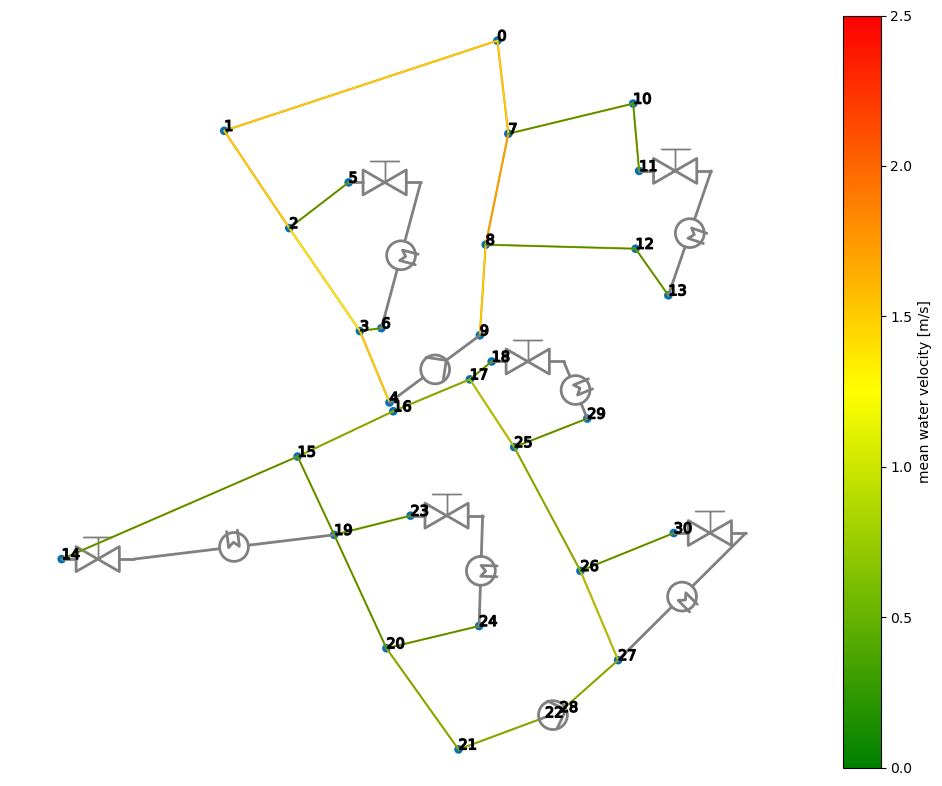

In [25]:
fc = plot.create_flow_control_collection(net, size=20, color='grey')
cpp = plot.create_pump_collection(net, table_name='circ_pump_pressure', color='grey', size=20, 
                                 fj_col='return_junction', tj_col='flow_junction')
cpm = plot.create_pump_collection(net, table_name='circ_pump_mass', color='grey', size=20, 
                                  fj_col='return_junction', tj_col='flow_junction')
hc = plot.create_heat_exchanger_collection(net, color='grey', size=20)

collections += [fc, cpp, cpm, hc]

plot.draw_collections(collections)
plt.show()

# Plot Heat Results

In [21]:
from pandapower.plotting import cmap_continuous

cmap_list_v = [(0.0, "green"), (1.25, "yellow"), (2.5, "red")]
cmap_v, norm_v = cmap_continuous(cmap_list_v)

In [22]:
vc = plot.create_pipe_collection(net, linewidths=1, cmap=cmap_v, norm=norm_v, 
                                 z=net.res_pipe.v_mean_m_per_s.abs(),
                                 cbar_title="mean water velocity [m/s]")

hp.pandapipes.plotting.collections - WARNING: use_junction_geodata is automatically set to True, since net.pipe_geodata is empty.


In [23]:
collections += [vc]

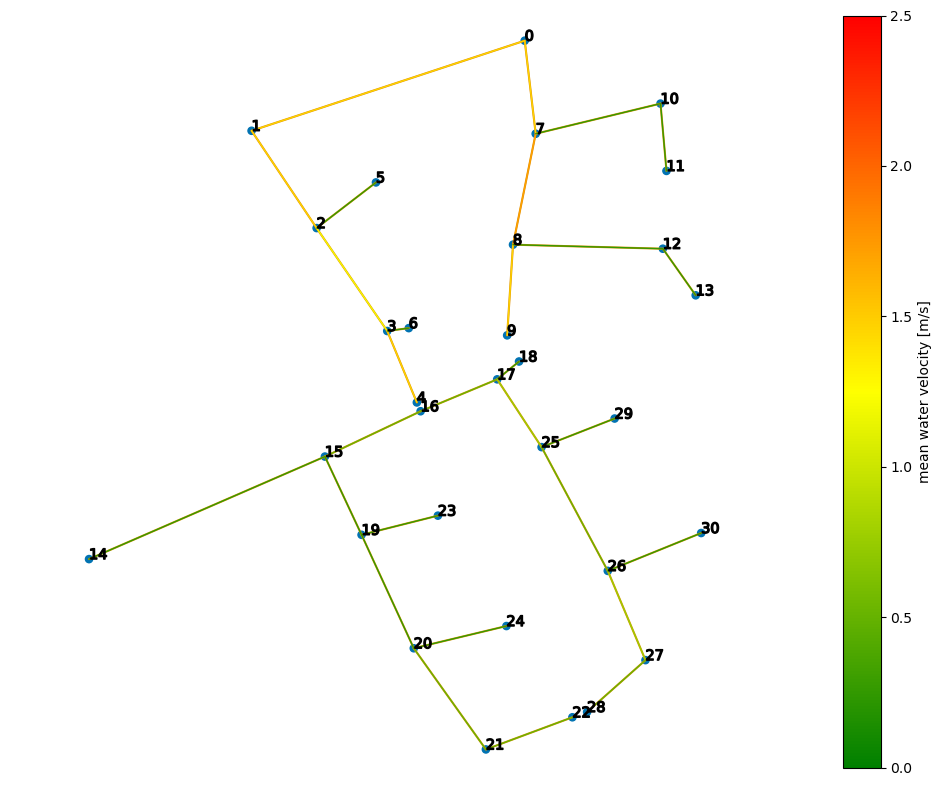

In [24]:
plot.draw_collections(collections)
plt.show()

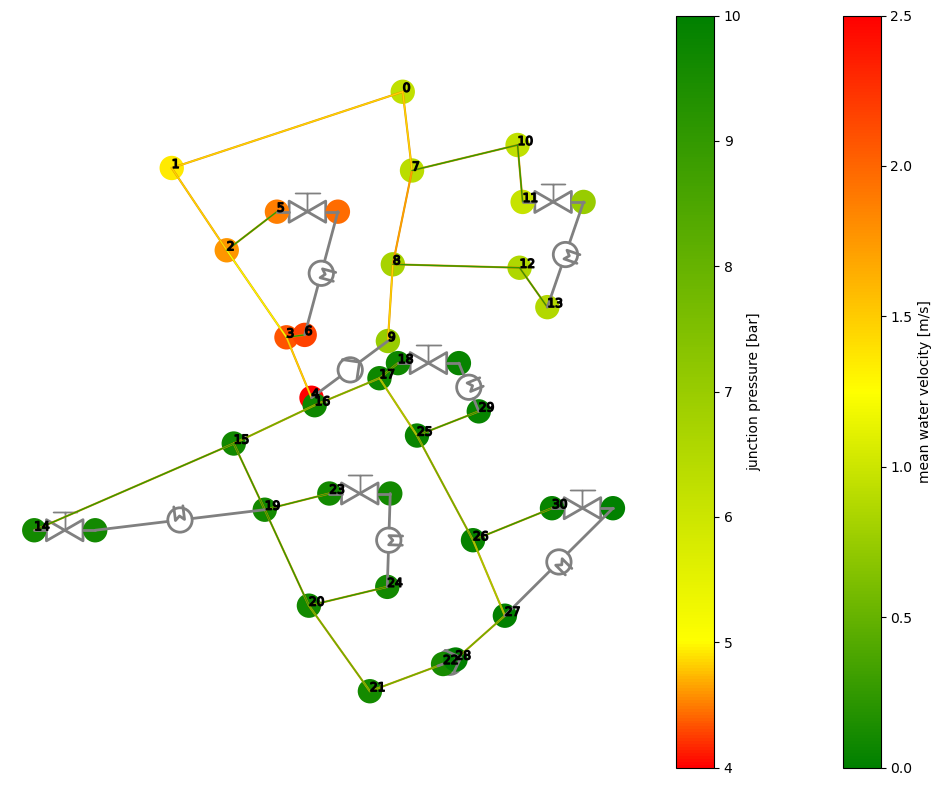

In [26]:
max_p = net.res_junction.p_bar.max()
cmap_list_p = [(4, 'red'), (max_p/2, 'yellow'), (max_p, 'green')]
cmap_p, norm_p = cmap_continuous(cmap_list_p)
jc = plot.create_junction_collection(net, size=20, cmap=cmap_p, norm=norm_p, 
                                     z=net.res_junction.p_bar, cbar_title="junction pressure [bar]")
collections += [jc]
plot.draw_collections(collections)
plt.show()

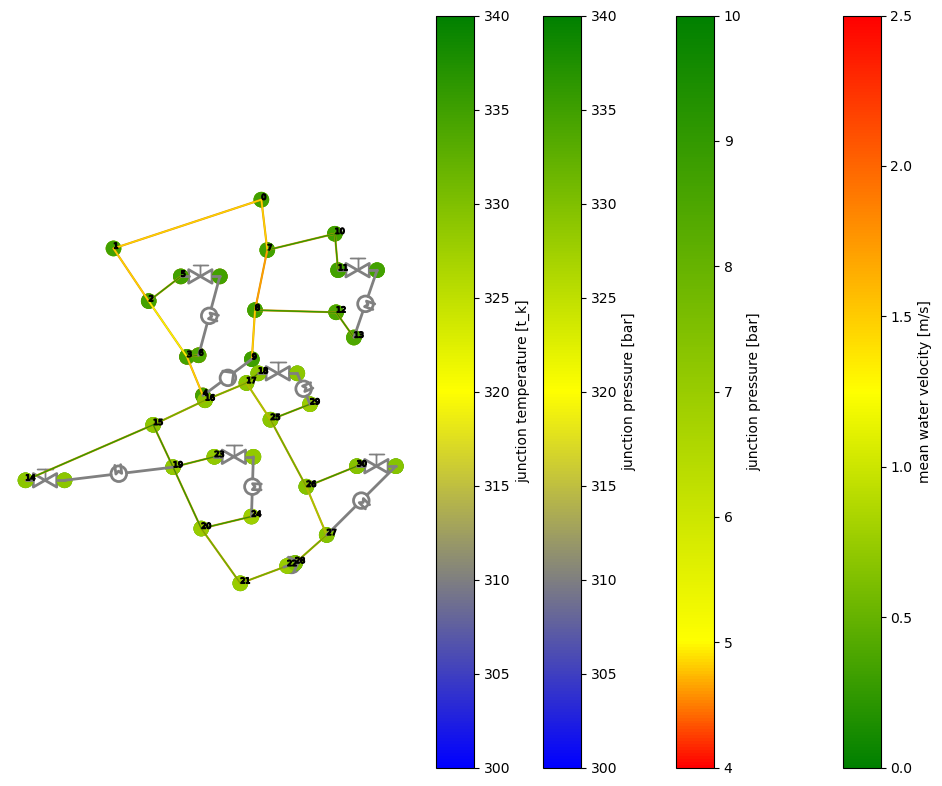

In [28]:
cmap_list_t = [(300, 'blue'), (320, 'yellow'), (340, 'green')]
cmap_t, norm_t = cmap_continuous(cmap_list_t)
tc = plot.create_junction_collection(net, size=20, cmap=cmap_t, norm=norm_t, 
                                     z=net.res_junction.t_k, cbar_title="junction temperature [t_k]", alpha=0.2)
collections += [tc]
plot.draw_collections(collections)
plt.show()